# Step 1: Load the Dataset

In [6]:
import pandas as pd

data = pd.read_csv('SampleSuperstore.csv')

# Step 2: Explore the Dataset

In [7]:
# Only first 5 rows

data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
# Check for missing values

data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Basic information of Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
# Shape of data

data.shape

(9994, 13)

# Step 3: Data Cleaning

In [11]:
# Drop rows with missing values

data = data.dropna()

In [12]:
# Check duplicates and remove them

data = data.drop_duplicates()

# Step 4: Data Analysis

In [13]:
# Analyze customer segments and their purchase behavior

segment_analysis = data['Segment'].value_counts()
segment_analysis

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [14]:
# Top 10 popular products by sales

popular_products = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
popular_products

Sub-Category
Phones         330007.0540
Chairs         327777.7610
Storage        223843.6080
Tables         206965.5320
Binders        203409.1690
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

# Step 5: Visualization

In [15]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns

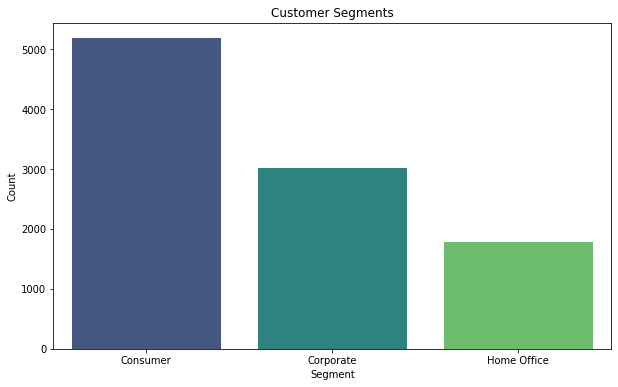

In [17]:
# Bar plot for customer segments

plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.savefig('C:/Users/HP/Desktop/Innobyte Services - Data Analyst Internship Offer and Task Allocation/sales_analysis/static/visualizations/plot1.png')

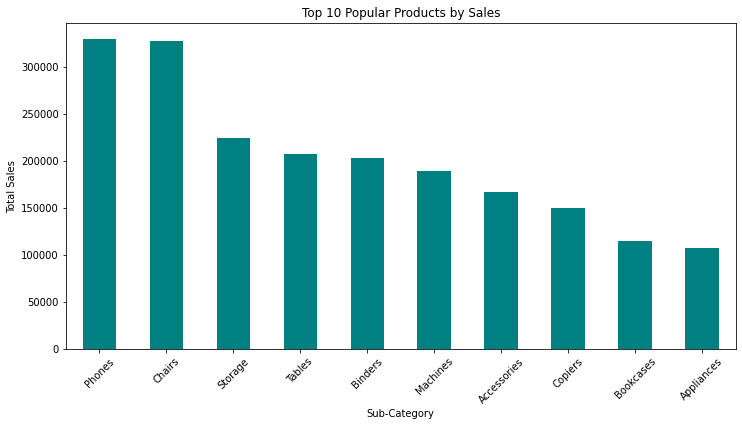

In [19]:
# Bar plot for popular products

plt.figure(figsize=(12, 6))
popular_products.plot(kind='bar', color='teal')
plt.title('Top 10 Popular Products by Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('C:/Users/HP/Desktop/Innobyte Services - Data Analyst Internship Offer and Task Allocation/sales_analysis/static/visualizations/plot2.png')

In [20]:
# Calculate basic descriptive statistics

total_sales = data['Sales'].sum()
average_order_value = data['Sales'].mean()
max_sales = data['Sales'].max()
min_sales = data['Sales'].min()

In [21]:
print("Descriptive Statistics:")
print("Total Sales:", total_sales)
print("Average Order Value:", average_order_value)
print("Maximum Sales:", max_sales)
print("Minimum Sales:", min_sales)

Descriptive Statistics:
Total Sales: 2296195.5903
Average Order Value: 230.14890150345792
Maximum Sales: 22638.48
Minimum Sales: 0.444


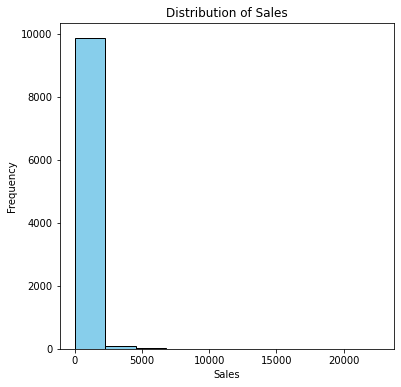

In [27]:
# Visualize the distribution of sales

plt.figure(figsize=(6, 6))
plt.hist(data['Sales'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.savefig('C:/Users/HP/Desktop/Innobyte Services - Data Analyst Internship Offer and Task Allocation/sales_analysis/static/visualizations/plot3.png')

In [31]:
# Calculate total sales, quantity, and orders for each customer
customer_data = data.groupby('Category').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
}).reset_index()

# Display the first few rows of the customer data
print(customer_data.head())

          Category        Sales  Quantity
0        Furniture  741306.3133      8020
1  Office Supplies  718735.2440     22861
2       Technology  836154.0330      6939


# Customer Segmentation

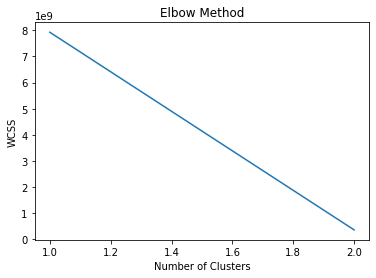

In [33]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, min(len(X), 11)):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, min(len(X), 11)), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()